In [1]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from DataFolder import CustomTestDataFolder, CustomTrainDataFolder
from DeepSVDD import DeepSVDD
from isolation_forest import DeepIsolationForest
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
])

In [4]:
train_cifar_path = "cifar10\\train\\airplane"
test_cifar_path = "cifar10\\test"
train_cifar_path_forest = "cifar10\\train"


In [5]:
train_cifar = CustomTrainDataFolder(root=train_cifar_path, transform=transform)
test_cifar = CustomTestDataFolder(root=test_cifar_path, transform=transform, normal_dir="airplane")
train_cifar_forest = ImageFolder(root=train_cifar_path_forest, transform=transform)


In [6]:
svdd_one_class = DeepSVDD(objective="one-class",nu=None,n_epoch=20,device=device, lr=0.2)
svdd_soft_boundary = DeepSVDD(objective="soft-boundary",nu=0.1,n_epoch=20,device=device, lr=0.2)

In [7]:
svdd_one_class.train(train_cifar)

Epoch 1/20: 100%|██████████| 40/40 [01:22<00:00,  2.05s/it]


Epoch 1/20    : Loss 278.8456839323044


Epoch 2/20: 100%|██████████| 40/40 [01:05<00:00,  1.63s/it]


Epoch 2/20    : Loss 1.3173372503370047


Epoch 3/20: 100%|██████████| 40/40 [01:05<00:00,  1.63s/it]


Epoch 3/20    : Loss 0.08175188452005386


Epoch 4/20: 100%|██████████| 40/40 [01:06<00:00,  1.67s/it]


Epoch 4/20    : Loss 0.040597055852413175


Epoch 5/20: 100%|██████████| 40/40 [01:07<00:00,  1.69s/it]


Epoch 5/20    : Loss 0.031248014746233822


Epoch 6/20: 100%|██████████| 40/40 [01:07<00:00,  1.68s/it]


Epoch 6/20    : Loss 0.023465469712391496


Epoch 7/20: 100%|██████████| 40/40 [01:07<00:00,  1.70s/it]


Epoch 7/20    : Loss 0.01919105164706707


Epoch 8/20: 100%|██████████| 40/40 [01:08<00:00,  1.71s/it]


Epoch 8/20    : Loss 0.017065231502056123


Epoch 9/20: 100%|██████████| 40/40 [01:07<00:00,  1.69s/it]


Epoch 9/20    : Loss 0.014619055227376521


Epoch 10/20: 100%|██████████| 40/40 [01:07<00:00,  1.68s/it]


Epoch 10/20    : Loss 0.012959753815084695


Epoch 11/20: 100%|██████████| 40/40 [01:07<00:00,  1.68s/it]


Epoch 11/20    : Loss 0.012537082843482494


Epoch 12/20: 100%|██████████| 40/40 [01:07<00:00,  1.70s/it]


Epoch 12/20    : Loss 0.010005658655427397


Epoch 13/20: 100%|██████████| 40/40 [01:09<00:00,  1.75s/it]


Epoch 13/20    : Loss 0.009202930750325322


Epoch 14/20: 100%|██████████| 40/40 [01:05<00:00,  1.65s/it]


Epoch 14/20    : Loss 0.008184672123752535


Epoch 15/20: 100%|██████████| 40/40 [01:06<00:00,  1.66s/it]


Epoch 15/20    : Loss 0.00772074501728639


Epoch 16/20: 100%|██████████| 40/40 [01:07<00:00,  1.69s/it]


Epoch 16/20    : Loss 0.007167828059755266


Epoch 17/20: 100%|██████████| 40/40 [01:07<00:00,  1.69s/it]


Epoch 17/20    : Loss 0.006667444831691682


Epoch 18/20: 100%|██████████| 40/40 [01:10<00:00,  1.76s/it]


Epoch 18/20    : Loss 0.006960406666621566


Epoch 19/20: 100%|██████████| 40/40 [01:08<00:00,  1.70s/it]


Epoch 19/20    : Loss 0.006498239014763385


Epoch 20/20: 100%|██████████| 40/40 [01:07<00:00,  1.68s/it]

Epoch 20/20    : Loss 0.005315954145044088


In [8]:
svdd_soft_boundary.train(train_cifar)

Epoch 1/20: 100%|██████████| 40/40 [01:07<00:00,  1.69s/it]


Epoch 1/20    : Loss 1100.5085960388183


Epoch 2/20: 100%|██████████| 40/40 [01:07<00:00,  1.68s/it]


Epoch 2/20    : Loss 252.5817008972168


Epoch 3/20: 100%|██████████| 40/40 [01:06<00:00,  1.66s/it]


Epoch 3/20    : Loss 79.8305233001709


Epoch 4/20: 100%|██████████| 40/40 [01:06<00:00,  1.67s/it]


Epoch 4/20    : Loss 13.423103272914886


Epoch 5/20: 100%|██████████| 40/40 [01:07<00:00,  1.69s/it]


Epoch 5/20    : Loss 2.1190527945756914


Epoch 6/20: 100%|██████████| 40/40 [01:06<00:00,  1.67s/it]


Epoch 6/20    : Loss 0.775987109541893


Epoch 7/20: 100%|██████████| 40/40 [01:07<00:00,  1.68s/it]


Epoch 7/20    : Loss 0.45179281905293467


Epoch 8/20: 100%|██████████| 40/40 [01:06<00:00,  1.67s/it]


Epoch 8/20    : Loss 0.2978446014225483


Epoch 9/20: 100%|██████████| 40/40 [01:07<00:00,  1.68s/it]


Epoch 9/20    : Loss 0.28913251906633375


Epoch 10/20: 100%|██████████| 40/40 [01:06<00:00,  1.67s/it]


Epoch 10/20    : Loss 0.4818857941776514


Epoch 11/20: 100%|██████████| 40/40 [01:07<00:00,  1.68s/it]


Epoch 11/20    : Loss 0.15005304627120494


Epoch 12/20: 100%|██████████| 40/40 [01:07<00:00,  1.68s/it]


Epoch 12/20    : Loss 0.12112637367099524


Epoch 13/20: 100%|██████████| 40/40 [01:06<00:00,  1.67s/it]


Epoch 13/20    : Loss 0.11406836751848459


Epoch 14/20: 100%|██████████| 40/40 [01:07<00:00,  1.68s/it]


Epoch 14/20    : Loss 0.12666364777833222


Epoch 15/20: 100%|██████████| 40/40 [01:07<00:00,  1.69s/it]


Epoch 15/20    : Loss 0.08611563611775637


Epoch 16/20: 100%|██████████| 40/40 [01:07<00:00,  1.69s/it]


Epoch 16/20    : Loss 0.07220837268978357


Epoch 17/20: 100%|██████████| 40/40 [01:07<00:00,  1.68s/it]


Epoch 17/20    : Loss 0.07275192979723215


Epoch 18/20: 100%|██████████| 40/40 [01:07<00:00,  1.68s/it]


Epoch 18/20    : Loss 0.06186887500807643


Epoch 19/20: 100%|██████████| 40/40 [01:07<00:00,  1.70s/it]


Epoch 19/20    : Loss 0.05256249336525798


Epoch 20/20: 100%|██████████| 40/40 [01:07<00:00,  1.69s/it]

Epoch 20/20    : Loss 0.05362355001270771


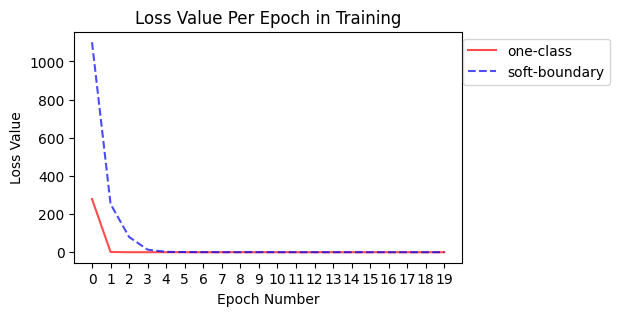

In [9]:
x = list(range(svdd_one_class.n_epoch))
y_one_class = svdd_one_class.epoch_losses
y_soft_boundary = svdd_soft_boundary.epoch_losses
plt.figure(figsize=(5,3))
plt.plot(x, y_one_class,color="red", label="one-class", linestyle="-", alpha=0.7)
plt.plot(x, y_soft_boundary, color="blue", label="soft-boundary", linestyle="--", alpha=0.7)
plt.title("Loss Value Per Epoch in Training")
plt.xlabel("Epoch Number")
plt.ylabel("Loss Value")
plt.xticks(x)
plt.legend(loc="upper right", bbox_to_anchor=(1.4,1))

plt.show()

In [10]:
svdd_one_class.test(test_cifar)
svdd_soft_boundary.test(test_cifar)

In [23]:
deep_iso_forest = DeepIsolationForest("resnet18", n_epochs=3, device=device)

In [24]:
deep_iso_forest.fit(train_cifar_forest)

Epoch 1 / 3: 100%|██████████| 391/391 [11:34<00:00,  1.78s/it]


Epoch 1/3    : Loss2.5002363526912603


Epoch 2 / 3: 100%|██████████| 391/391 [11:35<00:00,  1.78s/it]


Epoch 2/3    : Loss1.606208004305125


Epoch 3 / 3: 100%|██████████| 391/391 [11:34<00:00,  1.78s/it]


Epoch 3/3    : Loss1.4679268595507688
Getting the features..
Getting the features has finished.


In [25]:
deep_iso_forest.predict(test_cifar)

Getting the features..
Getting the features has finished.


In [26]:
print(f"One Class Deep SVDD AUC TEST: {svdd_one_class.test_auc}")
print(f"Soft Boundary Deep SVDD AUC TEST: {svdd_soft_boundary.test_auc}")
print(f"Isolation Forest AUC TEST: {deep_iso_forest.test_auc}")

One Class Deep SVDD AUC TEST: 0.5397672222222222
Soft Boundary Deep SVDD AUC TEST: 0.6449778333333334
Isolation Forest AUC TEST: 0.34231188888888886


In [27]:
def get_auc_and_time_data(model):
    test_auc = f"{model.test_auc:.3f}"
    if isinstance(model, DeepIsolationForest):
        train_model_time = float(f"{model.train_time_model:.3f}")
        train_forest_time = float(f"{model.train_time_forest:.3f}")
        train_total_time = float(f"{(model.train_time_model+model.train_time_forest):.3f}")
    else:
        train_model_time = float(f"{model.train_time:.3f}")
        train_forest_time = pd.NA
        train_total_time = train_model_time
    return (test_auc, train_total_time, train_model_time, train_forest_time)

In [18]:
import numpy as np
data = np.array([[*get_auc_and_time_data(svdd_one_class)],
        [*get_auc_and_time_data(svdd_soft_boundary)],
        [*get_auc_and_time_data(deep_iso_forest)]])
columns = ["auc", "total_time", "model_time", "forest_time"]
indexes = ["one-class deep svdd", "soft-boundary deep svdd", "deep isolation forest"]
df = pd.DataFrame(data=data, columns=columns, index=indexes)
print(df)


                           auc total_time model_time forest_time
one-class deep svdd      0.540       22.0       22.0        <NA>
soft-boundary deep svdd  0.645       22.0       22.0        <NA>
deep isolation forest    0.357   2092.978   2088.978         4.0


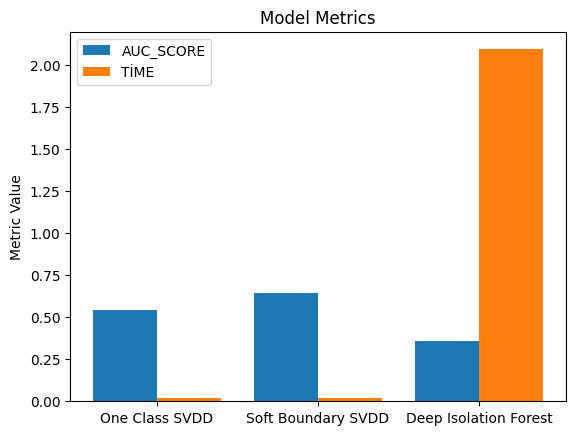

In [33]:
models = ['One Class SVDD', 'Soft Boundary SVDD', 'Deep Isolation Forest']
auc_score = data[:,0].astype(np.float64) 
total_time = data[:,1].astype(np.float64) * 0.001

x = np.arange(len(models))  # the label locations
width = 0.4  # width of each bar

# Plot
plt.bar(x - width/2, auc_score, width, label='AUC_SCORE')
plt.bar(x + width/2, total_time, width, label='TİME')

# Labels
plt.xticks(x, models)
plt.ylabel('Metric Value')
plt.title('Model Metrics')
plt.legend()

plt.show()
